## GEDI L4B Example

### Purpose
Demonstrate how to sample the GEDI L4B raster for BioDensity at generated PhoREAL points 

#### Import Packages

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import sliderule
from sliderule import icesat2

#### Initialize SlideRule Python Client

In [7]:
#icesat2.init("slideruleearth.io", verbose=True)
icesat2.init("localhost", verbose=True, organization=None)

#### Make Processing Request to SlideRule
ATL06-SR request includes the `samples` parameter to specify that GEDI L3 Mean Elevation dataset should be sampled at each generated ATL06 elevation.

In [8]:
asset = "icesat2"
resource = "ATL03_20220105023009_02111406_005_01.h5"
region = sliderule.toregion('grandmesa.geojson')
parms = { 
    "poly": region['poly'],
    "srt": icesat2.SRT_LAND,
    "len": 100,
    "res": 100,
    "pass_invalid": True, 
    "atl08_class": ["atl08_ground", "atl08_canopy", "atl08_top_of_canopy"],
    "phoreal": {"binsize": 1.0, "geoloc": "center", "use_abs_h": False, "send_waveform": False},
    "samples": {"gedi": {"asset": "gedil4b"}} 
}
gdf = icesat2.atl08p(parms, asset=asset, resources=[resource], keep_id=True)

INFO:sliderule.sliderule:request <AppServer.2> atl08 processing initiated on ATL03_20220105023009_02111406_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.2> processing of ATL03_20220105023009_02111406_005_01.h5 complete (405853/675/0/0)
INFO:sliderule.sliderule:request <AppServer.2> processing complete
INFO:sliderule.sliderule:Successfully completed processing resource [1 out of 1]: ATL03_20220105023009_02111406_005_01.h5


#### Display GeoDataFrame Columns
Notice the columns that start with "gedi", they are the sampled raster data

In [9]:
gdf.keys()

Index(['spot', 'canopy_openness', 'rgt', 'h_canopy', 'distance', 'gt',
       'solar_elevation', 'veg_ph_count', 'ph_count', 'h_mean_canopy',
       'extent_id', 'landcover', 'cycle', 'canopy_h_metrics', 'h_max_canopy',
       'snowcover', 'gnd_ph_count', 'h_min_canopy', 'segment_id',
       'h_te_median', 'geometry', 'gedi.time', 'gedi.file_id', 'gedi.value',
       'gedi.flags'],
      dtype='object')

#### Print Out File Directory
When a GeoDataFrame includes samples from rasters, each sample value has a file id that is used to look up the file name of the source raster for that value.

In [10]:
gdf.attrs['file_directory']

{0: '/vsis3/ornl-cumulus-prod-protected/gedi/GEDI_L4B_Gridded_Biomass/data/GEDI04_B_MW019MW138_02_002_05_R01000M_V2.tif'}

#### Filter GeoDataFrame Based on Valid Values

In [16]:
df = gdf[gdf["gedi.value"] > -9999.0]
df

,spot,canopy_openness,rgt,h_canopy,distance,gt,solar_elevation,veg_ph_count,ph_count,h_mean_canopy,...,snowcover,gnd_ph_count,h_min_canopy,segment_id,h_te_median,geometry,gedi.time,gedi.file_id,gedi.value,gedi.flags
time,,,,,,,,,,,,,,,,,,,,,
2022-01-05 02:35:30.428004352,5,2.012999,211,9.754150,1.571297e+07,50,-28.980322,128,138,5.826794,...,2,10,0.811279,784492,2776.188232,POINT (-107.83354 39.17038),1.312070e+09,0,405.898132,0
2022-01-05 02:35:30.442004480,5,2.910884,211,10.977295,1.571307e+07,50,-28.980183,108,124,5.453199,...,2,16,0.672119,784497,2808.480225,POINT (-107.83365 39.16949),1.312070e+09,0,405.898132,0
2022-01-05 02:35:30.456254464,5,2.541708,211,12.275391,1.571317e+07,50,-28.980038,102,109,6.525355,...,2,7,1.547607,784502,2826.003906,POINT (-107.83376 39.16859),1.312070e+09,0,405.898132,0
2022-01-05 02:35:30.470454528,5,3.425928,211,16.177246,1.571327e+07,50,-28.979898,105,115,6.279476,...,2,10,1.057617,784507,2867.182129,POINT (-107.83386 39.16769),1.312070e+09,0,405.898132,0
2022-01-05 02:35:30.484504320,5,2.801692,211,12.923340,1.571337e+07,50,-28.979757,90,96,5.859218,...,2,6,1.028320,784512,2922.691895,POINT (-107.83397 39.16679),1.312070e+09,0,405.898132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 02:35:34.152954624,6,1.039127,211,4.924805,1.573704e+07,60,-28.945862,75,93,2.235804,...,2,18,0.529053,785693,2222.430908,POINT (-107.86101 38.95460),1.312070e+09,0,0.696155,0
2022-01-05 02:35:34.166954496,6,1.135524,211,5.363525,1.573714e+07,60,-28.945715,61,82,2.286657,...,2,21,0.701904,785698,2210.756592,POINT (-107.86112 38.95371),1.312070e+09,0,0.696155,0
2022-01-05 02:35:34.181704448,6,0.812399,211,3.688232,1.573725e+07,60,-28.945568,8,63,1.617950,...,2,55,1.008057,785703,2188.233887,POINT (-107.86123 38.95277),1.312070e+09,0,0.696155,0


#### Plot the Different GEDI Values against the SlideRule PhoREAL Values

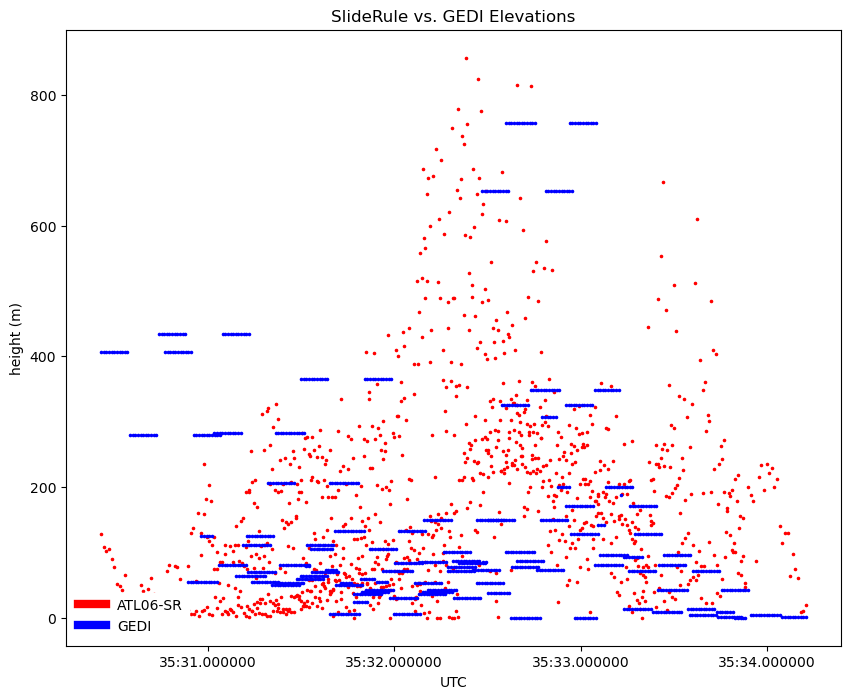

In [19]:
# Setup Plot
fig,ax = plt.subplots(num=None, figsize=(10, 8))
fig.set_facecolor('white')
fig.canvas.header_visible = False
ax.set_title("SlideRule vs. GEDI Elevations")
ax.set_xlabel('UTC')
ax.set_ylabel('height (m)')
legend_elements = []

# Plot SlideRule ATL06 Elevations
sc1 = ax.scatter(df.index.values, df["veg_ph_count"].values, c='red', s=2.5)
legend_elements.append(matplotlib.lines.Line2D([0], [0], color='red', lw=6, label='ATL06-SR'))

# Plot GEDI Elevations
sc2 = ax.scatter(df.index.values, df["gedi.value"].values, c='blue', s=2.5)
legend_elements.append(matplotlib.lines.Line2D([0], [0], color='blue', lw=6, label='GEDI'))

# Display Legend
lgd = ax.legend(handles=legend_elements, loc=3, frameon=True)
lgd.get_frame().set_alpha(1.0)
lgd.get_frame().set_edgecolor('white')

# Show Plot
plt.show()